# CS5661 Homework 3
Kevin Lam (CIN: 303061725) 

### Importing necessary libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [49]:
#To allow images to be shown inside Jupyter
%matplotlib inline

### Loading the dataset

In [50]:
#Load dataset
img_df = pd.read_csv('label.csv')

### Part A - Loading and Displaying Image

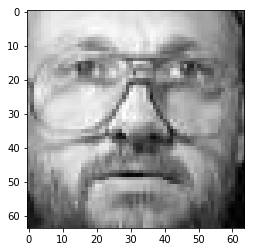

In [51]:
first_img = mpimg.imread('Face/0.jpg')
plt.imshow(first_img, cmap=plt.cm.gray)

### Create list for column names
Format will be 'Pixel_XY' with X & Y ranging from 1-64 to represent each pixel location in a 64x64 grid

In [119]:
column_list = []
for i in range(1,65):
    for j in range(1,65):
        name = 'Pixel_' + str(i) + '_' + str(j)
        column_list.append(name)

pixel_column_list = column_list.copy() # Keep copy of just the pixel columns for easier referencing in training

#Create label vector
y = img_df['Label']

# Create dataframe based on column list
df = pd.DataFrame(columns = [column_list])
df.head()

,Pixel_1_1,Pixel_1_2,Pixel_1_3,Pixel_1_4,Pixel_1_5,Pixel_1_6,Pixel_1_7,Pixel_1_8,Pixel_1_9,Pixel_1_10,...,Pixel_64_55,Pixel_64_56,Pixel_64_57,Pixel_64_58,Pixel_64_59,Pixel_64_60,Pixel_64_61,Pixel_64_62,Pixel_64_63,Pixel_64_64


### Part B - Iterate through the csv, read and append data to dataframe

In [120]:
df = df[0:0] # Clear dataframe

for i in range(400):                   # Loop through the csv
    img = mpimg.imread('Face/' + str(i) +".jpg").reshape(-1)             # Read image and collapse into a 1-dimensional array (8x8 -> 1x64)
    data = list(img)
    s = pd.Series(data, index=column_list)
    df = df.append(s, ignore_index=True) # Append to dataframe

df.head()

,Pixel_1_1,Pixel_1_2,Pixel_1_3,Pixel_1_4,Pixel_1_5,Pixel_1_6,Pixel_1_7,Pixel_1_8,Pixel_1_9,Pixel_1_10,...,Pixel_64_55,Pixel_64_56,Pixel_64_57,Pixel_64_58,Pixel_64_59,Pixel_64_60,Pixel_64_61,Pixel_64_62,Pixel_64_63,Pixel_64_64
0,186,183,179,190,212,219,221,232,230,231,...,56,45,47,18,0,8,15,9,3,5
1,204,198,194,195,198,195,190,186,190,193,...,19,0,29,52,90,146,130,120,164,167
2,86,79,82,95,100,102,121,146,169,179,...,160,167,179,169,192,188,197,189,185,141
3,61,90,98,119,144,156,174,177,183,195,...,119,244,246,168,126,187,162,145,58,18
4,99,134,165,183,201,210,215,224,232,236,...,83,90,94,90,70,41,71,103,92,117


### Part C - Normalizing the columns of the feature matrix

In [121]:
normalized_df = scale(df)

print(normalized_df)

[[ 1.37649641  1.11885303  0.79610373 ..., -1.17094622 -1.24726506
  -1.21711982]
 [ 1.68113398  1.3654141   1.03570156 ...,  0.68710075  1.48558299
   1.58234648]
 [-0.31593455 -0.59063704 -0.75329558 ...,  1.84210291  1.84204144
   1.13304942]
 ..., 
 [ 0.98723729  1.02022861  1.01972837 ..., -0.58507555 -0.48342554
  -0.38764832]
 [ 0.68259971  0.52710647  0.34885444 ...,  0.88797069  0.63687242
   0.71831368]
 [-0.231313   -0.67282406 -1.0088666  ..., -0.06616154 -0.55132239
  -0.50861291]]


### Part D - Split Normalized Dataset into Testing and Training

In [122]:
#X = normalized_df

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, test_size=0.25, random_state=5)

### Part E - Using PCA to reduce the dimensionality

In [123]:
my_pca = PCA(n_components = 50)

X_Train_new = my_pca.fit_transform(X_train)
X_Test_new = my_pca.transform(X_test)

### Part F - SVM Classifier

In [124]:
my_svm = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
my_svm.fit(X_Train_new, y_train)
y_predict = my_svm.predict(X_Test_new)
acc_svm = accuracy_score(y_test, y_predict)
print('SVM Accuracy:',acc_svm)

SVM Accuracy: 0.91


### Part F (Continued) - Confusion Matrix

In [125]:
confusion_matrix(y_test, y_predict)

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 1]])

### Part G - Using GridSearchCV & Results

In [126]:
#Search for C in this list
C_List = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

new_X = np.concatenate([X_Train_new, X_Test_new])
new_y = np.concatenate([y_train, y_test])

param_grid = {'C':C_List}

# create the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_svm, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(new_X, new_y)

print("Best Accuracy:",grid.best_score_)
print("Best value for C:",grid.best_params_)

Best Accuracy: 0.96
Best value for C: {'C': 1}
